In [1]:
import numpy as np
import random
import data as dt 
import matplotlib.pyplot as plt
import geometry as geo
from rtree import index

In [8]:
# load the data from a file .npy
data = np.load('./rectangle_data_labels.npy')
data_p = np.load('./rectangle_data_points.npy')
print(data.__len__())

1000


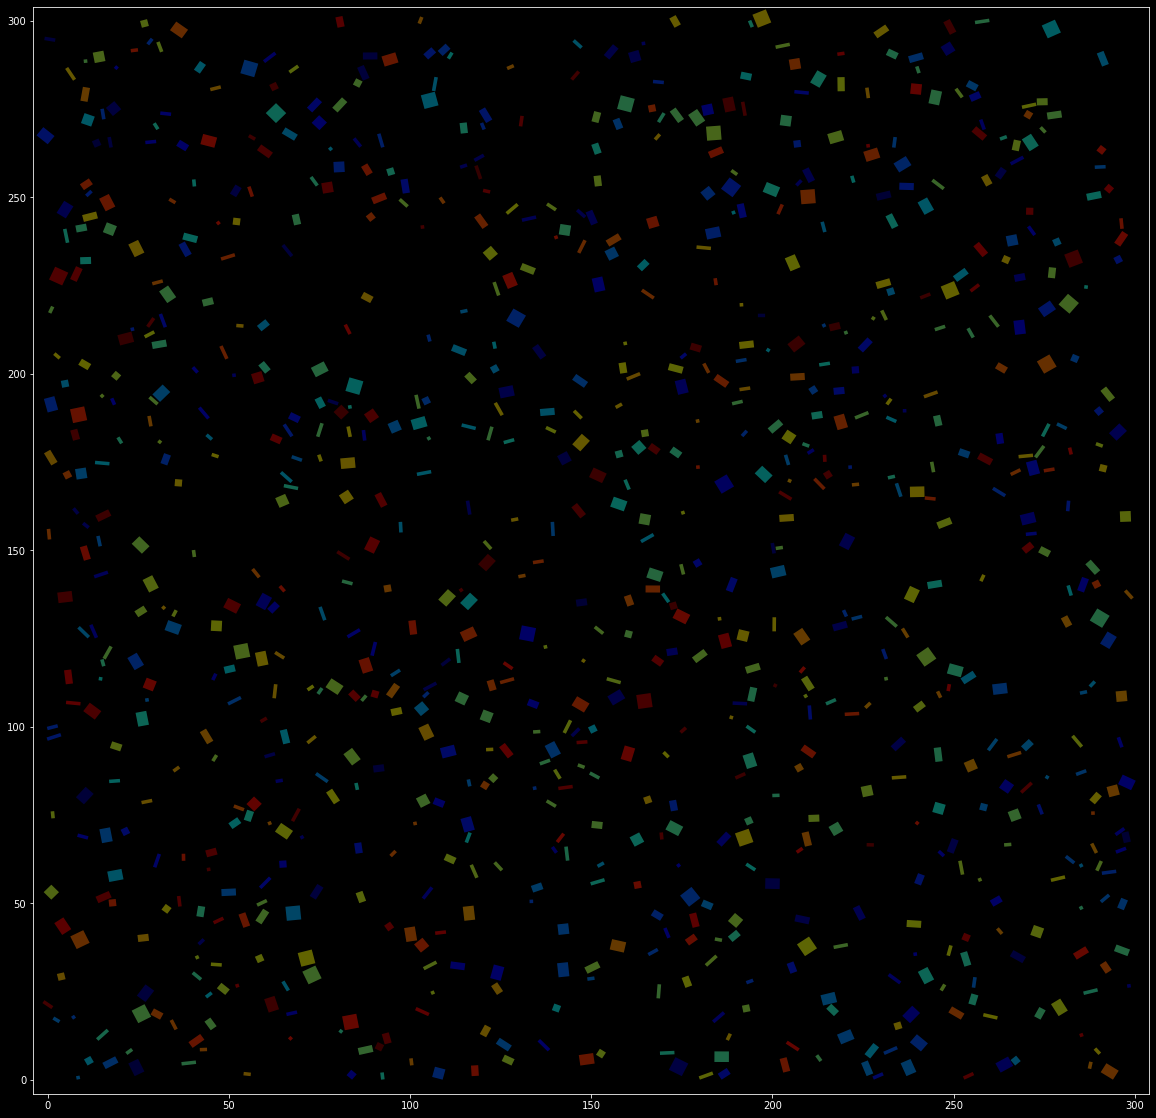

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geometry as geo
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def plot_data(data, size=10, limits=[-10, 10, -10, 10]):
    fig, ax = plt.subplots(figsize=(size, size))
    patches = []
    num_polygons = data.__len__()

    for i in range(num_polygons):
        rectangle = data[i]
        polygon = Polygon(rectangle, True)
        patches.append(polygon)

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

    colors = 100*np.random.rand(len(patches))
    p.set_array(np.array(colors))

    ax.add_collection(p)
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])
    plt.show()

plot_data(data_p, size=20, limits=[-4,304, -4, 304])

In [12]:
from  sklearn.neighbors._kde import KernelDensity
from scipy.signal import argrelextrema
def GetBandwidth(data):
    # get bandwidth for kernel density estimation
    # bw must be limited by:
    # 1. it minimizes the distance between the maximum and mean of a cluster
    # 2. the distance between two cluster means is maximazied
    # or be chosen manually
    # or be chosen by cross validation
    # or so that the cluster's sizes are not too different from each other
    bandwidth = 0
    
  
    
    return bandwidth
def rclustering(dataset, bandwidth_method = 'opt'): 
    dataset = np.array(dataset)
    data = dataset[:,-1]
    if bandwidth_method == 'opt':
        bandwidth = GetBandwidth(data)
    else:
        bandwidth = float(bandwidth_method)
    #print("bandwidth: ", bandwidth)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data.reshape(-1, 1))
    s = np.linspace(0,90)
    e = kde.score_samples(s.reshape(-1,1))
    plt.plot(s, e)
    mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
    # print them
    #print("minima: ", s[mi])
    #print("maxima: ", s[ma])
    # create a np.array of the clusters
    # maximum length is one more than minimum
    clusters = []
    for i in range(mi.__len__()):
        temp = []
        if i == 0:
            for j in range(data.__len__()):
                if data[j] <= s[mi[i]]:
                    temp.append(dataset[j])
            clusters.append(np.array(temp))
            continue
        if i > 0 and i <= mi.__len__()-1:
            for j in range(data.__len__()):
                if data[j] <= s[mi[i]] and data[j] > s[mi[i-1]]:
                    temp.append(dataset[j])
            clusters.append(np.array(temp))
            if i == mi.__len__()-1:
                temp = []
                for j in range(data.__len__()):
                    if data[j] > s[mi[i]]:
                        temp.append(dataset[j])
                clusters.append(np.array(temp))
            continue
    print("number of clusters: ", clusters.__len__())
    return np.array(clusters), s[mi], s[ma]
                
# compress data and calculate error for each cluster
def compress_data(clusters, min, max):
    print("No of clusters: ", clusters.__len__())
    print("No of min and max points: ", min.__len__(), max.__len__())
    error = [0 for i in range (clusters.__len__())]
    
    for i in range(clusters.__len__()):
        maxima = np.max(clusters[i][:,-1])
        print("maxima: ", maxima)
        mean = np.mean(clusters[i][:,-1])
        print("mean: ", mean)
        # calculate error
        for j in range(clusters[i].__len__()):
            error[i] += (maxima - clusters[i][j][-1])
            clusters[i][j][-1] = mean 
    return clusters , error

# create a cost function for w_error and bandwidth, so that u choose bandwidth to minimize w_error
# w_error must take into  account the number of clusters, we dont want to have too many clusters or too few
def cost_function(bandwidth):
    clusters, min, max = rclustering(data, bandwidth_method = bandwidth)
    new_data , error = compress_data(clusters, min, max)
    print("error: ", error)
    w_error = 0
    n_error = []
    for i in range(error.__len__()):
        w_error += np.abs(error[i])
        n_error.append( error[i] / clusters[i].__len__())
    return w_error,n_error, error, clusters.__len__()

number of clusters:  5
No of clusters:  5
No of min and max points:  4 4
maxima:  5.366663019307038
mean:  0.8061521161970077
maxima:  21.99566318420097
mean:  12.996571042722818
maxima:  43.947047541739806
mean:  31.799589972819298
maxima:  50.8776589540354
mean:  47.329822970472556
maxima:  89.89533815332706
mean:  67.62282660881198


C:\Users\wolfm\AppData\Local\Temp\ipykernel_15116\405164238.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters), s[mi], s[ma]


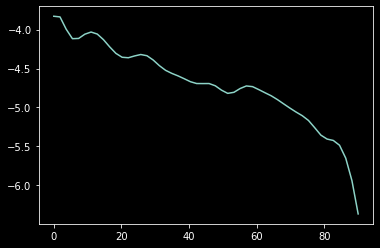

In [14]:
cluster,min_, max_ = rclustering(data, bandwidth_method = 3)
clusters, error = compress_data(cluster, min_, max_)